<a href="https://colab.research.google.com/github/danchaud-vincent/tensorflow-deep-learning/blob/main/exercices-solutions/03_Computer_Vision_and_Neural_Network_Exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Computer Vision and Neural Networks Exercices

Take a dataset on kaggle (ex: cat vs dog) and Build a CNN image classifier using the techniques we've built in the course notebook. 

Find an ideal learning rate for a simple convolutional neural network model on the dataset.

In [ ]:
# Importing the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive

## 1. GET THE DATASET

I have download an image classifier dataset of cats and dogs from kaggle on the following webpage [cat and dog](https://www.kaggle.com/datasets/tongpython/cat-and-dog?select=test_set).

### 1.1 UNZIP the file

In [ ]:
# read data from the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/MACHINE_LEARNING/DATASET/cat_vs_dog.zip","r")
zip_ref.extractall()
zip_ref.close()

### 1.2. INSPECT THE DATASET

In [ ]:
ls "cat_vs_dog"

test/  train/


We can see the folder of the dataset get a test and a train folder

In [ ]:
ls "cat_vs_dog/test/"

cat/  dog/


In [ ]:
ls "cat_vs_dog/test/dog/"

 dog.4001.jpg       dog.4251.jpg       dog.4503.jpg       dog.4754.jpg
 dog.4002.jpg       dog.4252.jpg       dog.4504.jpg       dog.4755.jpg
 dog.4003.jpg       dog.4253.jpg       dog.4505.jpg       dog.4756.jpg
 dog.4004.jpg       dog.4254.jpg       dog.4506.jpg       dog.4757.jpg
 dog.4005.jpg       dog.4255.jpg       dog.4507.jpg       dog.4758.jpg
 dog.4006.jpg       dog.4256.jpg       dog.4508.jpg       dog.4759.jpg
 dog.4007.jpg       dog.4257.jpg       dog.4509.jpg       dog.4760.jpg
 dog.4008.jpg       dog.4258.jpg       dog.4510.jpg       dog.4761.jpg
 dog.4009.jpg       dog.4259.jpg       dog.4511.jpg       dog.4762.jpg
 dog.4010.jpg       dog.4260.jpg       dog.4512.jpg       dog.4763.jpg
 dog.4011.jpg       dog.4261.jpg       dog.4513.jpg       dog.4764.jpg
 dog.4012.jpg       dog.4262.jpg       dog.4514.jpg       dog.4765.jpg
 dog.4013.jpg       dog.4263.jpg       dog.4515.jpg       dog.4766.jpg
 dog.4014.jpg       dog.4264.jpg       dog.4516.jpg       dog.4767.jpg
 dog.4

In [ ]:
# walk through cat_vs_dog directory 
import os
for dirpath, dirnames, filenames in os.walk("cat_vs_dog"):
  print(f"{dirpath} has {len(dirnames)} folders and {len(filenames)} files")

cat_vs_dog has 2 folders and 0 files
cat_vs_dog/train has 2 folders and 0 files
cat_vs_dog/train/cat has 0 folders and 4001 files
cat_vs_dog/train/dog has 0 folders and 4006 files
cat_vs_dog/test has 2 folders and 0 files
cat_vs_dog/test/cat has 0 folders and 1012 files
cat_vs_dog/test/dog has 0 folders and 1013 files


In [ ]:
# Get the class names
import pathlib

data_dir = pathlib.Path("cat_vs_dog/train")
class_names = sorted([item.name for item in data_dir.glob("*")])
class_names

['cat', 'dog']

### 1.3 Visualize the data

In [ ]:
# libraries
import matplotlib.image as mpimg
import random

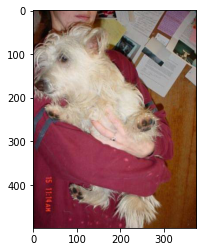

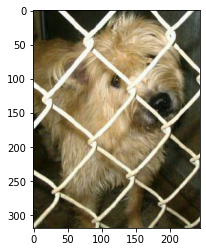

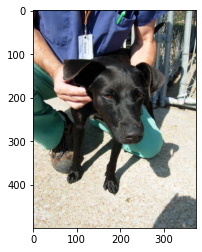

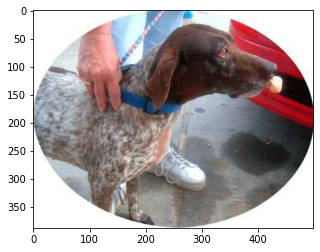

In [ ]:
# plot some random images
dirname = "cat_vs_dog"
folder_name = "train"
class_name = "dog"

# select random images
random_images = random.sample(os.listdir(f"{dirname}/{folder_name}/{class_name}"),4)

for image in random_images:
 
  img = mpimg.imread(f"{dirname}/{folder_name}/{class_name}/{image}")
  plt.figure()
  plt.imshow(img)
  plt.show()

In [ ]:
# build a function to visualize random image
def plot_random_images(target_dir, target_class, num_images):
  """
  Plot random images of a target class

  Arguments:
  - targer_dir (str): name of the directory 
  - target_class (str): name of the class of the images
  - num_images (int): number of images to plot
  """

  # create path 
  path = f"{target_dir}/{target_class}"

  # select random images
  random_images = random.sample(os.listdir(path),num_images)

  # plot the images
  for i, image in enumerate(random_images):

    # read the image
    img = mpimg.imread(path+"/"+image)

    # shape of the image
    shape_img = img.shape

    # create a figure
    plt.figure()
    plt.imshow(img)
    plt.title(f"Image {i} | Shape : {shape_img}")
    plt.show()


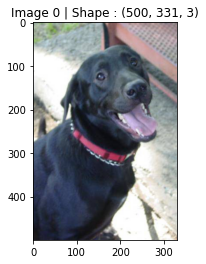

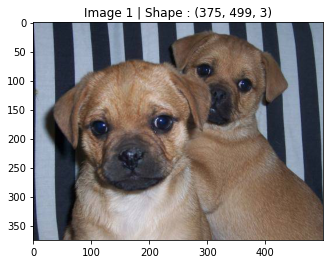

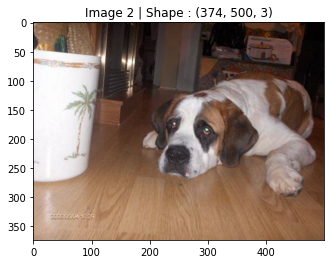

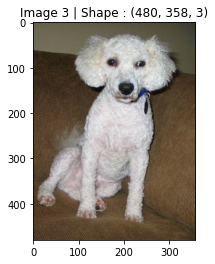

In [ ]:
# visualize some images of dog
plot_random_images("cat_vs_dog/train","dog",4)

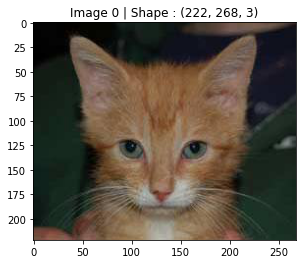

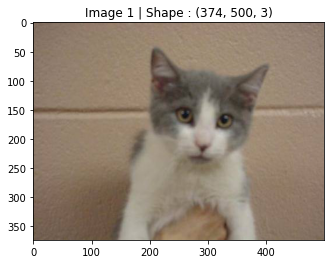

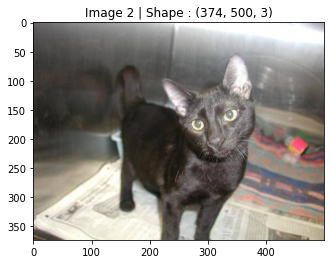

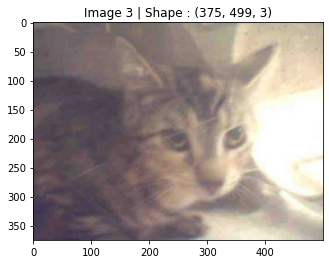

In [ ]:
# visualize some images of cats
plot_random_images("cat_vs_dog/train","cat",4)

In [ ]:
# Get max and min of an image
random_image = random.sample(os.listdir(f"cat_vs_dog/train/dog"),1)
img = mpimg.imread(f"cat_vs_dog/train/dog/{random_image[0]}")

print("Max of the image:", np.max(img))
print("Min of the image:", np.min(img))

Max of the image: 255
Min of the image: 0


# 2. Build a CNN classifier

In [ ]:
# import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense

## 2.1 Model 1





### 2.1.1 Preprocess the data

In [ ]:
# Define the directories paths
train_dir = "cat_vs_dog/train/"
test_dir = "cat_vs_dog/test/"

In [ ]:
# Create train and test data generators (rescale the data)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               class_mode="binary",
                                               batch_size=32,
                                               target_size=(224,224))

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             class_mode="binary",
                                             batch_size=32,
                                             target_size=(224,224))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
# get a sample of a train data batch
images, labels = train_data.next()

images.shape, labels

((32, 224, 224, 3),
 array([1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
        0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       dtype=float32))

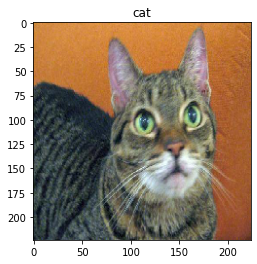

9


In [ ]:
# visualize an image in the batch
index = np.random.randint(len(labels))
class_image = class_names[int(labels[index])]
plt.figure()
plt.imshow(images[index])
plt.title(class_image)
plt.show()

print(index)

### 2.1.2 Create a model

In [ ]:
# create a tiny vgg model
model_1 = tf.keras.Sequential([
    Conv2D(filters=62,kernel_size=3, activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=60, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=62,kernel_size=3, activation="relu"),
    Conv2D(filters=60, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 63s 194ms/step - loss: 0.6944 - accuracy: 0.5457 - val_loss: 0.6844 - val_accuracy: 0.5329
Epoch 2/5
251/251 [==============================] - 52s 208ms/step - loss: 0.6715 - accuracy: 0.5979 - val_loss: 0.6582 - val_accuracy: 0.6085
Epoch 3/5
251/251 [==============================] - 50s 198ms/step - loss: 0.6304 - accuracy: 0.6576 - val_loss: 0.6639 - val_accuracy: 0.6085
Epoch 4/5
251/251 [==============================] - 49s 194ms/step - loss: 0.5634 - accuracy: 0.7082 - val_loss: 0.6800 - val_accuracy: 0.6238
Epoch 5/5
251/251 [==============================] - 50s 200ms/step - loss: 0.4549 - accuracy: 0.7825 - val_loss: 0.6393 - val_accuracy: 0.6782


In [ ]:
# summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 62)      1736      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 60)      33540     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 60)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 62)      33542     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 60)      33540     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 60)       0         
 2D)                                                    

### 2.1.3 Visualize results

In [ ]:
# DataFrame of losses and accuracy
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,0.694391,0.545659,0.684413,0.532872
1,0.671459,0.597876,0.658164,0.608502
2,0.630391,0.657589,0.663946,0.608502
3,0.563359,0.708182,0.680041,0.623826
4,0.454878,0.782511,0.639331,0.678201


In [162]:
# create a function to plot loss curves
def plot_loss_curves(history):
  """
  Plot the loss curves and the accuracy curves of a trained model

  Arguments:
  - history: history of the trained model
  """

  # convert history into a dataframe
  df = pd.DataFrame(history.history)

  # loss values
  loss_train = df["loss"]
  loss_val = df["val_loss"]

  # accuracy values
  acc_train = df["accuracy"]
  acc_val = df["val_accuracy"]

  # figure
  fig, ax = plt.subplots(1,2,figsize=(10,7))
  
  ax[0].plot(loss_train, label="training loss")
  ax[0].plot(loss_val, label="validation loss")
  ax[0].set_xlabel("epochs")
  ax[0].set_title("Loss")
  ax[0].legend()

  ax[1].plot(acc_train, label="training accuracy")
  ax[1].plot(acc_val, label="validation accuracy")
  ax[1].set_xlabel("epochs")
  ax[1].set_title("Accuracy")
  ax[1].legend()

  plt.show()

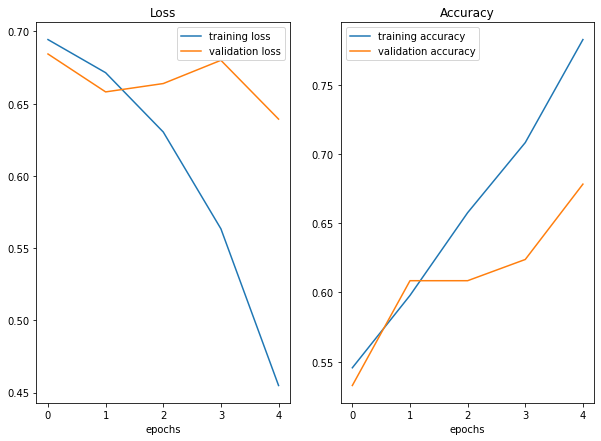

In [163]:
# loss curves of the first model
plot_loss_curves(history_1)

As we can see our model is learning, however it still need to be improved. We can try to train longer, or use data augmentation.

## 2.2 Model 2 : Data Augmentation

### 2.2.1 Preprocess the data

In [ ]:
# Data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.15,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# load data in from directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   shuffle=True,
                                                                   batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             shuffle=True,
                                             batch_size=32)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### 2.2.2 Create the model

In [ ]:
# create a second model tiny vgg
model_2 = tf.keras.Sequential([
    Conv2D(filters=62, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=60, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=62,kernel_size=3, activation="relu"),
    Conv2D(filters=60, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model with the augmented data
history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 122s 481ms/step - loss: 0.7011 - accuracy: 0.5263 - val_loss: 0.6885 - val_accuracy: 0.5897
Epoch 2/5
251/251 [==============================] - 118s 469ms/step - loss: 0.6878 - accuracy: 0.5400 - val_loss: 0.6661 - val_accuracy: 0.5961
Epoch 3/5
251/251 [==============================] - 116s 462ms/step - loss: 0.6607 - accuracy: 0.6116 - val_loss: 0.6493 - val_accuracy: 0.6258
Epoch 4/5
251/251 [==============================] - 119s 475ms/step - loss: 0.6423 - accuracy: 0.6316 - val_loss: 0.6173 - val_accuracy: 0.6831
Epoch 5/5
251/251 [==============================] - 120s 477ms/step - loss: 0.6336 - accuracy: 0.6498 - val_loss: 0.5859 - val_accuracy: 0.7044


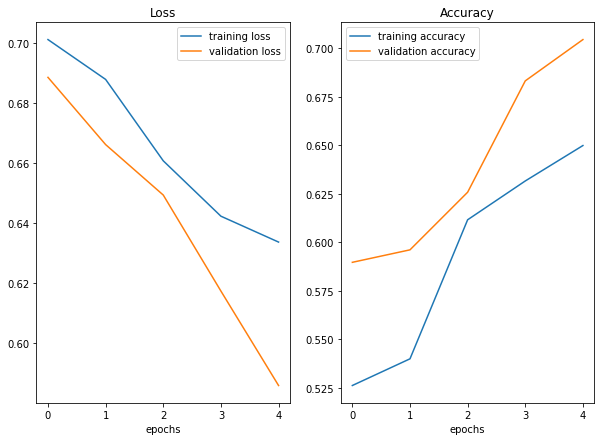

In [164]:
# loss curves of the first model
plot_loss_curves(history_2)

The loss curves are much closer to each other. Although our model didn't perform as well on the augmented trainin set, it performed much better on the validation set.

## 2.3 Model 3 : Build the CNN Explainer model, and find the best learning rate




Let's try to creat the same model than the model in the CNN Explainer Website. It has the same architecture (tiny vgg) but each layer has less neurons than our previous models. We will try to build a simpliest model by we will train it much longer.